In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from particle_creation import par_create_2d
from mass_asign import cic_density_2d
from acceleration import cic_acc_2d
from gravty import grav_from_den_2d

In [13]:
ng = 16
num_par = 2
pars_pos = np.array([[6,0],[10,0]]).astype(np.float32)
# pars_pos = (np.random.rand(num_par, 2)*ng).astype(np.float32)
pars_vel = np.array([[0,1],[0,1]]).astype(np.float32)
# pars_vel = np.zeros_like(pars_pos).astype(np.float32)
# pars_mass = np.random.rand(num_par).astype(np.float32)*10
# pars_mass = np.array([1]).astype(np.float32)
pars_mass = np.ones_like(pars_pos[:,0]).astype(np.float32)
pars_df = pd.DataFrame({'pos_x': pars_pos[:,0], 'pos_y': pars_pos[:,1],
                        'vel_x': pars_vel[:,0], 'vel_y': pars_vel[:,1],
                        'mass': pars_mass})
par_list = par_create_2d(pars_df)
pars_df

,pos_x,pos_y,vel_x,vel_y,mass
0,6.0,0.0,0.0,1.0,1.0
1,10.0,0.0,0.0,1.0,1.0


[42.33919056  0.        ] [-42.33919056   0.        ]
[-123.75975764    0.        ] [123.75975764   0.        ]
[105.11217892   0.        ] [-105.11217892    0.        ]
[71.25538157  0.        ] [-71.25538157   0.        ]
[28.41753531  0.        ] [-28.41753531   0.        ]


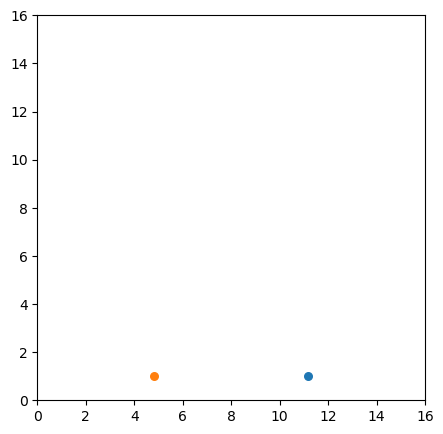

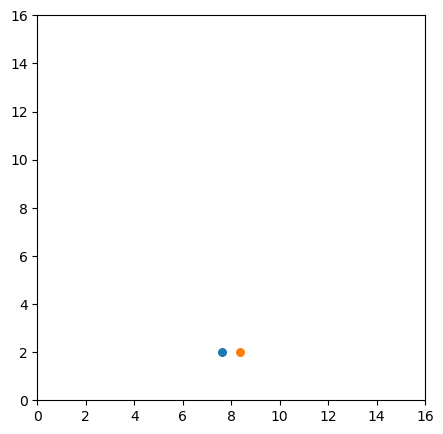

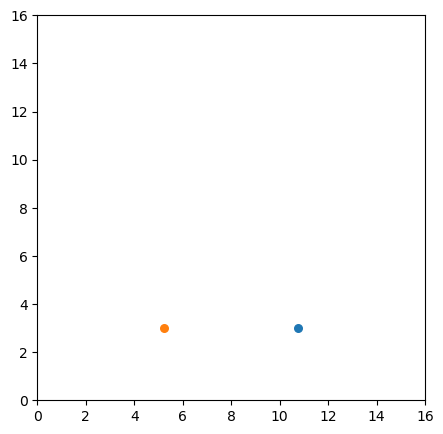

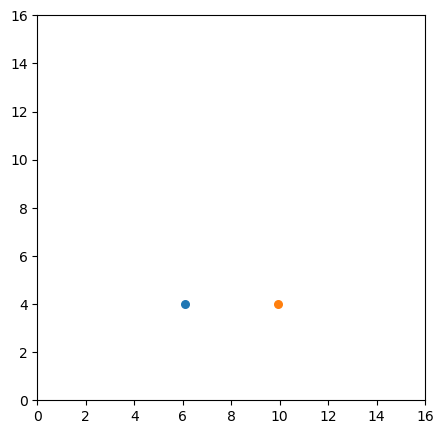

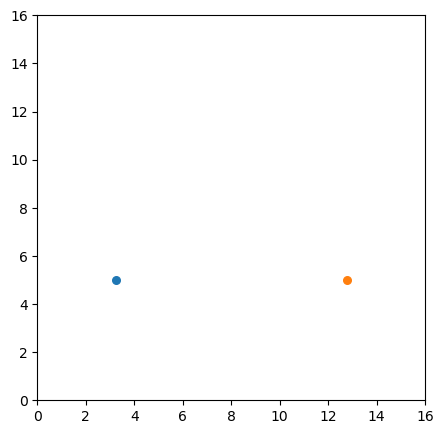

In [14]:
dt = 1
for step in range(5):
     
    for par in par_list:
        # Fitrst step:
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.pos = np.where(par.pos > ng, par.pos%ng, par.pos)
        par.pos = np.where(par.pos < 0, par.pos%ng, par.pos)
        
    dens = cic_density_2d(pars=par_list, ng=ng, h=1) ## Update density field
    gravity = grav_from_den_2d(dens)    ## Update gravity field
    cic_acc_2d(pars=par_list, ng=ng, gravity=gravity, h=1)  ## Update acceleration
    print(par_list[0].acc, par_list[1].acc)
    # Second step:
    for par in par_list:
        par.vel += par.acc * dt
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.pos = np.where(par.pos > ng, par.pos%ng, par.pos)
        par.pos = np.where(par.pos < 0, par.pos%ng, par.pos)
    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.set_ylim(0, ng)
    for par in par_list:
    # for par in [par_list[0]]:
        ax.scatter(par.pos[0], par.pos[1], s=30)
        ax.set_xlim(0, ng)
        ax.set_ylim(0, ng)
    

In [8]:
par_list[0].vel

array([123.36453,   1.     ], dtype=float32)

In [9]:
par_list[0].acc

array([28.41753531,  0.        ])

In [10]:
par_list[1].acc

array([-28.41753531,   0.        ])

In [46]:
par.acc

array([-5.55111512e-17,  0.00000000e+00])

In [14]:
par_list[0].pos

array([8.       , 7.7841544], dtype=float32)

In [18]:
par_list[1].acc

array([6.66133815e-16, 5.20219912e+00])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax in axes.flatten():
    ax.set_xlim(0, ng)
    ax.set_ylim(0, ng)
im1 = axes[0].pcolormesh(acc_x)
cb1 = plt.colorbar(im1)
im2 = axes[1].pcolormesh(acc_x1)
cb2 = plt.colorbar(im2)